In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Logistic Regression Before SMOTE

In [2]:
#load the data
train = pd.read_csv("train.csv")
train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


### Train/Test split

In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train, test_size=0.10, random_state=42)

### TF-IDF Vectorization

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_word = TfidfVectorizer(max_features=10000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,2),dtype=np.float32)
train_original = train_df
test_original = test_df
train_df = train_original.sample(frac = 0.05)
test_df = test_original.sample(frac = 0.05)
tr_vect = vect_word.fit_transform(train_df['question_text'])
ts_vect = vect_word.transform(test_df['question_text'])

### Logistic Regression Model before SMOTE

In [6]:
model = LogisticRegression()
model.fit(tr_vect,train_df['target'])

pred =  model.predict(ts_vect)
print(classification_report(test_df['target'],pred))
print 'accuracy', accuracy_score(test_df['target'],pred)
print "f1_score ", f1_score(test_df['target'],pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6143
           1       0.68      0.20      0.31       388

   micro avg       0.95      0.95      0.95      6531
   macro avg       0.81      0.60      0.64      6531
weighted avg       0.94      0.95      0.93      6531

accuracy 0.9468687796662073
f1_score  0.3128712871287129


Average precision-recall score: 0.47


Text(0.5,1,'Precision Recall Curve: Avg precision-recall score=0.47')

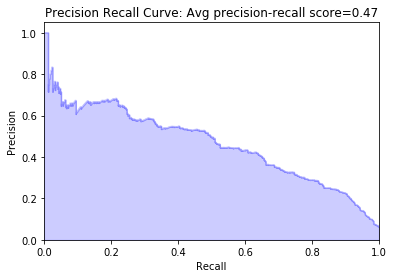

In [8]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

x_test = ts_vect
y_score = model.decision_function(x_test)

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(test_df['target'], y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

precision, recall, _ = precision_recall_curve(test_df['target'], y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve: Avg precision-recall score={0:0.2f}'.format(average_precision))

### Logistic Regression Model AFTER SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy=0.50)
y = train_df['target']
X_smote, y_smote = smt.fit_sample(tr_vect, y)
X_smote_test = ts_vect
Y_smote_test = test_df['target']

In [11]:
smote_model = LogisticRegression()
smote_model.fit(X_smote,y_smote)

#confusion matrix for test dataset 
pred_smote =  smote_model.predict(ts_vect)
print 'accuracy', accuracy_score(test_df['target'],pred_smote)
print(classification_report(test_df['target'],pred_smote))




accuracy 0.8963405297810443
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      6143
           1       0.30      0.58      0.40       388

   micro avg       0.90      0.90      0.90      6531
   macro avg       0.64      0.75      0.67      6531
weighted avg       0.93      0.90      0.91      6531



Text(0.5,1,'Precision Recall Curve: Avg precision-recall score=0.47')

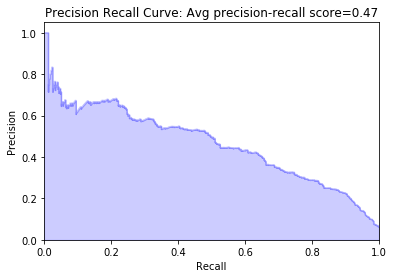

In [12]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

x_test = ts_vect
y_score = model.decision_function(x_test)
precision, recall, _ = precision_recall_curve(test_df['target'], y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve: Avg precision-recall score={0:0.2f}'.format(average_precision))